In [6]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import random 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import stormeunice as eun
import metpy as mp

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)

In [2]:
eps = inidate = '2022-02-16'
experiments = ['curr']
eps = eun.data.Data.get_eps_data(experiments, inidate = inidate)

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/cf/1_2022-02-16.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/sfc/pf/1_2022-02-16.nc


In [3]:
# ERA5
era5_2022 = xr.open_dataset('/gf3/predict2/AWH012_LEACH_NASTORM/DATA/ERA5/EU025/sfc/2022.nc')

In [4]:
lon_min = -15
lon_max = 5
lat_min = 45
lat_max = 60

In [5]:
euroatlantic = [lon_min-13, lon_max, lat_min-5, lat_max+6]
uk = [-11, 5, 48, 60]

Text(0.5, 1.0, 'ERA5')

/home/e/ermis/nobackups/miniconda3/envs/storm_eunice39/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


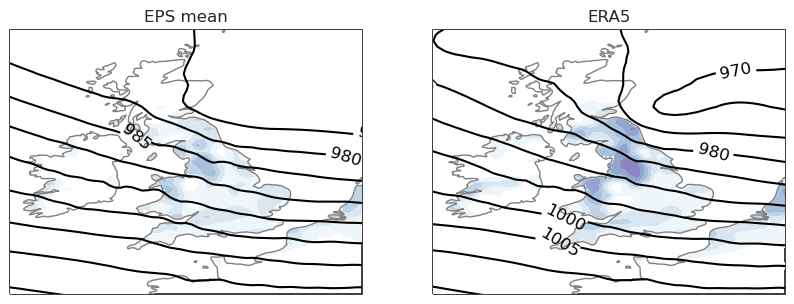

In [29]:
timestep = '2022-02-16 21'
# figure and map setup
projection = ccrs.PlateCarree()
p_max = 1040
p_min = 960

fg10_min = 20
fg10_max = 40

fig = plt.figure(1, figsize=(10, 10))

# EPS data ------------------    
latitude = eps['curr'].latitude
longitude = eps['curr'].longitude

p_vals = eps['curr'].sel(time=timestep).mean('number').msl.values/100
fg10_vals = eps['curr'].sel(time=timestep).mean('number').fg10.values

ax = plt.subplot(1,2,1,projection = projection)
ax.set_extent(uk, projection)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)
ax.add_feature(cfeature.OCEAN, zorder=12, color = 'white')  #zorder > 10

# fg10 as shading
clevs_fg10 = np.linspace(fg10_min, fg10_max, 11)  # 17
cf = ax.contourf(longitude, latitude, fg10_vals, clevs_fg10, cmap=plt.cm.BuPu,
                transform=projection, zorder = 10, extend = 'max')

# isobars as contours
clevs_p = np.linspace(p_min, p_max, 17) 
cs = ax.contour(longitude, latitude, p_vals, clevs_p, colors='black',
                transform=projection, zorder = 16)
plt.clabel(cs, fmt='%d')
plt.title('EPS mean')

# ERA5 data ------------------    
latitude = era5_2022.latitude
longitude = era5_2022.longitude

p_vals = era5_2022.sel(time=timestep).msl.values/100
fg10_vals = era5_2022.sel(time=timestep).fg10.values

ax = plt.subplot(1,2,2,projection = projection)
ax.set_extent(uk, projection)
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey', zorder = 14)
ax.add_feature(cfeature.OCEAN, zorder=12, color = 'white')  #zorder > 10

# fg10 as shading
clevs_fg10 = np.linspace(fg10_min, fg10_max, 11)  # 17
cf = ax.contourf(longitude, latitude, fg10_vals, clevs_fg10, cmap=plt.cm.BuPu,
                transform=projection, zorder = 10, extend = 'max')

# isobars as contours
clevs_p = np.linspace(p_min, p_max, 17) 
cs = ax.contour(longitude, latitude, p_vals, clevs_p, colors='black',
                transform=projection, zorder = 16)
plt.clabel(cs, fmt='%d')
plt.title('ERA5')

Text(0.5, 0.98, 'IFS Forecast at 18 UTC, Feb 16 2022, Initialisation on Feb 16')

/home/e/ermis/nobackups/miniconda3/envs/storm_eunice39/lib/python3.9/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


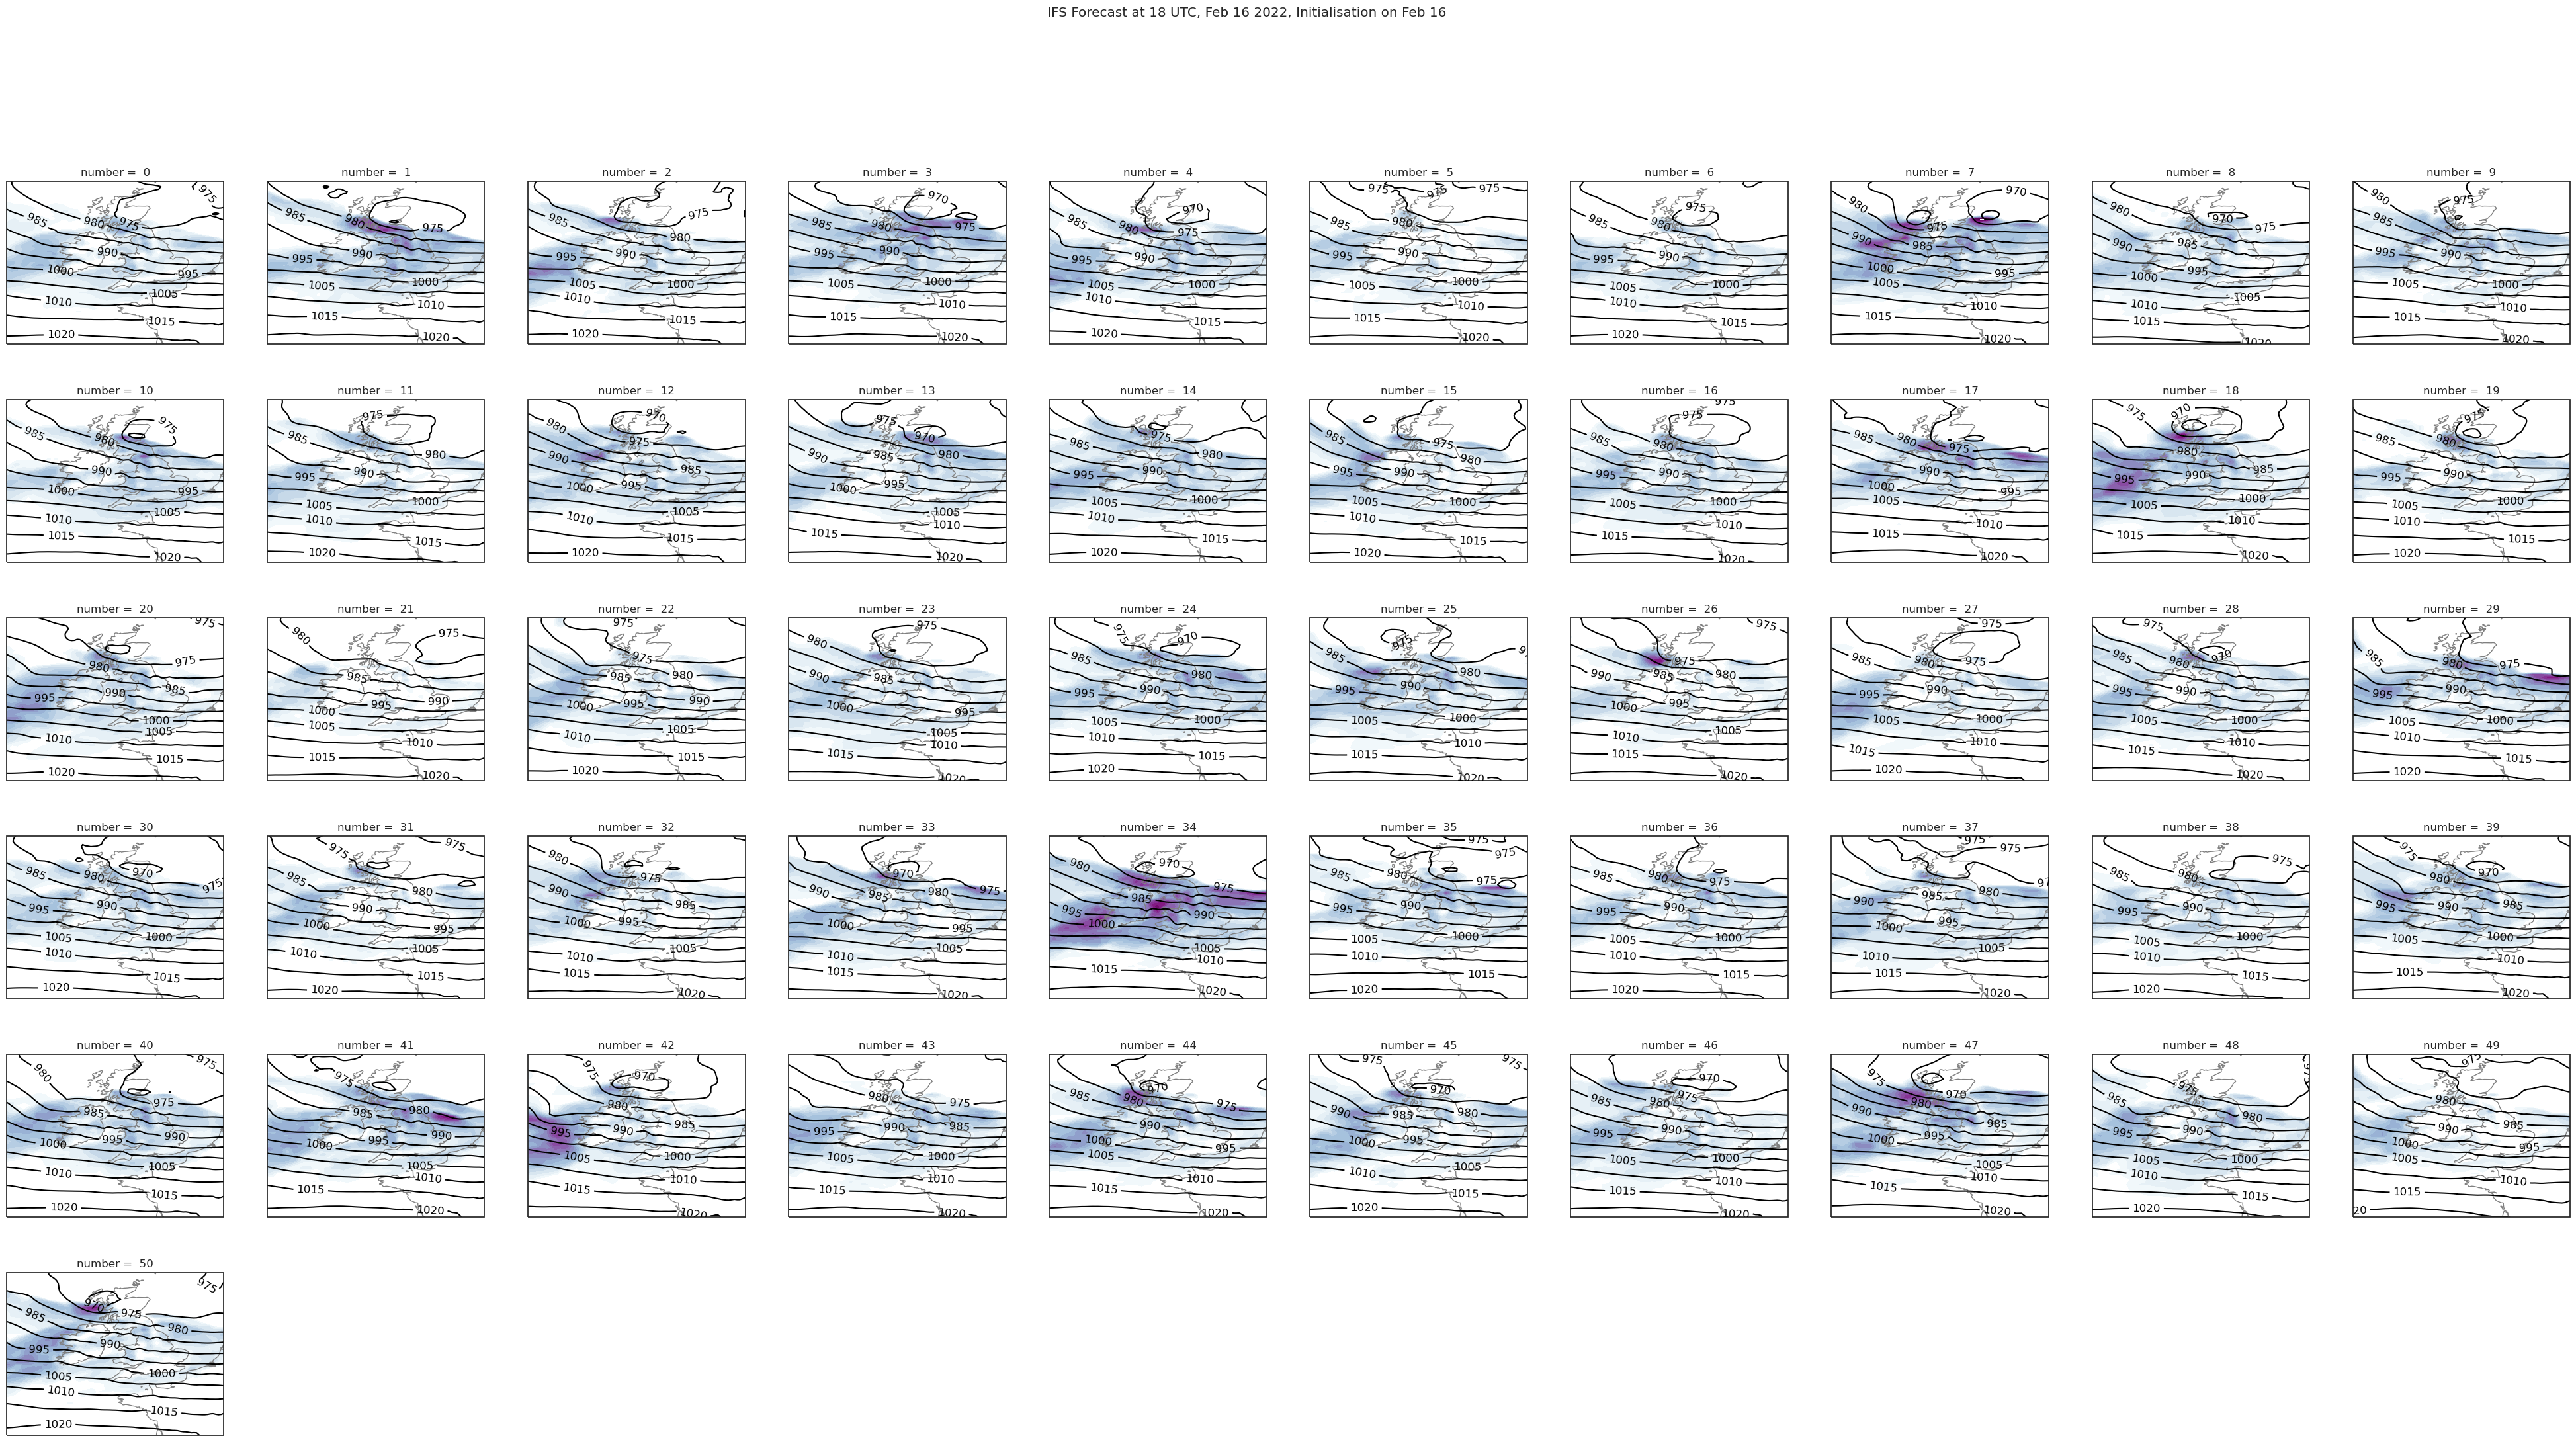

In [32]:
projection = ccrs.PlateCarree()

eps_feb18 = eps['curr'].sel(time='2022-02-16 18').sel(latitude=slice(lat_max,lat_min),longitude=slice(lon_min, lon_max)).squeeze()
fig = plt.figure(1, figsize=(50, 25))

for m in range(51):
    fg10_vals = eps_feb18.fg10.values[m,:,:]
    p_vals = eps_feb18.msl.values[m,:,:]/100
    longitude = eps_feb18.longitude.values
    latitude = eps_feb18.latitude.values

    # figure and map setup
    ax = plt.subplot(6,10,m+1, projection = projection)
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), color = 'grey')

    # fg10 as shading
    clevs_fg10 = np.linspace(fg10_min, fg10_max, 17)
    cf = ax.contourf(longitude, latitude, fg10_vals, clevs_fg10, cmap=plt.cm.BuPu,
                    transform=projection)

    # isobars as contours
    clevs_p = np.linspace(p_min, p_max, 17)
    cs = ax.contour(longitude, latitude, p_vals, clevs_p, colors='black',
                    transform=projection)
    plt.clabel(cs, fmt='%d')

    ax.set_title("number =  "+ str(m))

plt.suptitle('IFS Forecast at 18 UTC, Feb 16 2022, Initialisation on Feb 16')

# Isentrope analysis

In [12]:
def get_eps_pl_data(experiments, inidate='2022-02-16', level=500):

    eps = {}

    for experiment in experiments:

        directory = {'pi': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/pi/EU025/pl/',
                        'curr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/',
                        'incr': '/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/EXP/incr/EU025/pl/'}

        exp_eps = []
        for c, cont in enumerate(['cf', 'pf']):
            for files in glob.glob(directory[experiment]
                                    + cont + '/extravars/*'
                                    + inidate + '*.nc'):
                print(files)
                data = xr.open_dataset(files)
                exp_eps.append(eun.data.Data.preproc_ds(data.get(['t',
                                                                        'r',
                                                                        'q',
                                                                        'w',
                                                                        'vo',
                                                                        'u',
                                                                        'v',
                                                                        'z'])))

            eps[experiment] = xr.concat(exp_eps, dim='number').squeeze()

    return eps

In [13]:
eps = inidate = '2022-02-16'
experiments = ['curr']
eps = get_eps_pl_data(experiments, inidate = inidate)  # , level=[850, 700, 500, 200]

/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/cf/extravars/1_2022-02-16.nc
/gf3/predict2/AWH012_LEACH_NASTORM/DATA/MED-R/ENS/EU025/pl/pf/extravars/1_2022-02-16.nc


In [ ]:
eps['curr']

In [ ]:
metpy.calc.isentropic_interpolation_as_dataset